In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

In [2]:
#Read feature data frame
df = pd.read_csv('2yJapanfeat.cvs')
print(df.shape)

(3391, 29919)


In [3]:
#remove non-variable values
dfr = df.loc[:, (df != df.iloc[0]).any()]
print(dfr.shape)

(3391, 14027)


In [4]:
#PCA analysis
n = 200
x = StandardScaler().fit_transform(dfr)
pca = PCA(n_components=n)
PCAfeatures = pca.fit(x)

In [5]:
#PCA results
var = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
print(pca.explained_variance_ratio_)
print('Total Variance Explained by', n, 'components:', sum(list(pca.explained_variance_ratio_))*100)

[2.32153460e-01 8.49511433e-02 7.17312334e-02 3.86447391e-02
 3.47078529e-02 3.34000387e-02 3.25071811e-02 2.28975459e-02
 1.86624677e-02 1.83348103e-02 1.72449975e-02 1.64179115e-02
 1.54687608e-02 1.47756045e-02 1.34371817e-02 1.18443925e-02
 1.17770151e-02 1.16258991e-02 1.10688951e-02 1.05532060e-02
 1.01375010e-02 9.94862275e-03 8.97538476e-03 8.55196815e-03
 7.97369318e-03 6.49057335e-03 6.41701461e-03 6.02048039e-03
 5.52970061e-03 5.41096814e-03 5.20892953e-03 4.59742289e-03
 3.66583325e-03 3.36956582e-03 3.01563327e-03 2.62010309e-03
 2.57573469e-03 2.18212865e-03 2.11111335e-03 1.99155496e-03
 1.89544879e-03 1.50069990e-03 1.44842358e-03 1.41241613e-03
 1.33848994e-03 1.20531223e-03 1.17355303e-03 1.14217969e-03
 1.13906516e-03 1.12371543e-03 1.12016191e-03 1.08673116e-03
 1.05440197e-03 1.01667665e-03 9.66742836e-04 9.25572448e-04
 8.68760400e-04 8.26056568e-04 8.13495810e-04 8.05439056e-04
 7.29964702e-04 7.22650673e-04 7.17963287e-04 6.77569261e-04
 6.60496673e-04 6.399743

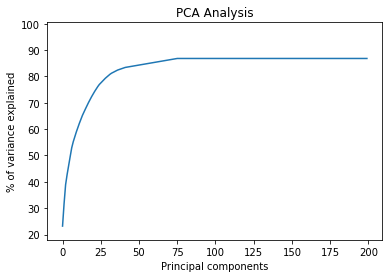

In [6]:
#Plot the principal components and variance they explain
plt.ylabel('% of variance explained')
plt.xlabel('Principal components')
plt.title('PCA Analysis')
plt.ylim(18,100.5)
plt.style.context('seaborn-whitegrid')
plt.plot(var)
plt.show()

In [7]:
#Save the selected PCA features into a cvs
PCAfeatures = pca.fit_transform(x)
dfPCA = pd.DataFrame(PCAfeatures)
dfPCA.to_csv('2YPCAfeatures.csv')
print(dfPCA.shape)

(3391, 200)
